In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv('../Data/train.csv')

In [9]:
test = pd.read_csv('../Data/test.csv')

In [12]:
train.drop('Id', axis=1 ,inplace=True)

In [13]:
test.drop('Id', axis=1, inplace=True)


In [19]:
all_data = pd.concat((train, test), axis=0)

In [20]:
all_data.shape

(2919, 80)

In [21]:
train.shape

(1460, 80)

In [22]:
test.shape

(1459, 79)

In [31]:
all_data.drop('SalePrice', axis=1, inplace=True)

In [33]:
all_data.shape

(2919, 79)

In [35]:
obj_col = []
for col in all_data.columns:
    if all_data[col].values.dtype == object:
        obj_col.append(col)

In [44]:
obj_col

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [43]:
from sklearn.preprocessing import LabelEncoder

In [45]:
for col in obj_col:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))

In [46]:
_obj_col = []
for col in all_data.columns:
    if all_data[col].values.dtype == object:
        _obj_col.append(col)

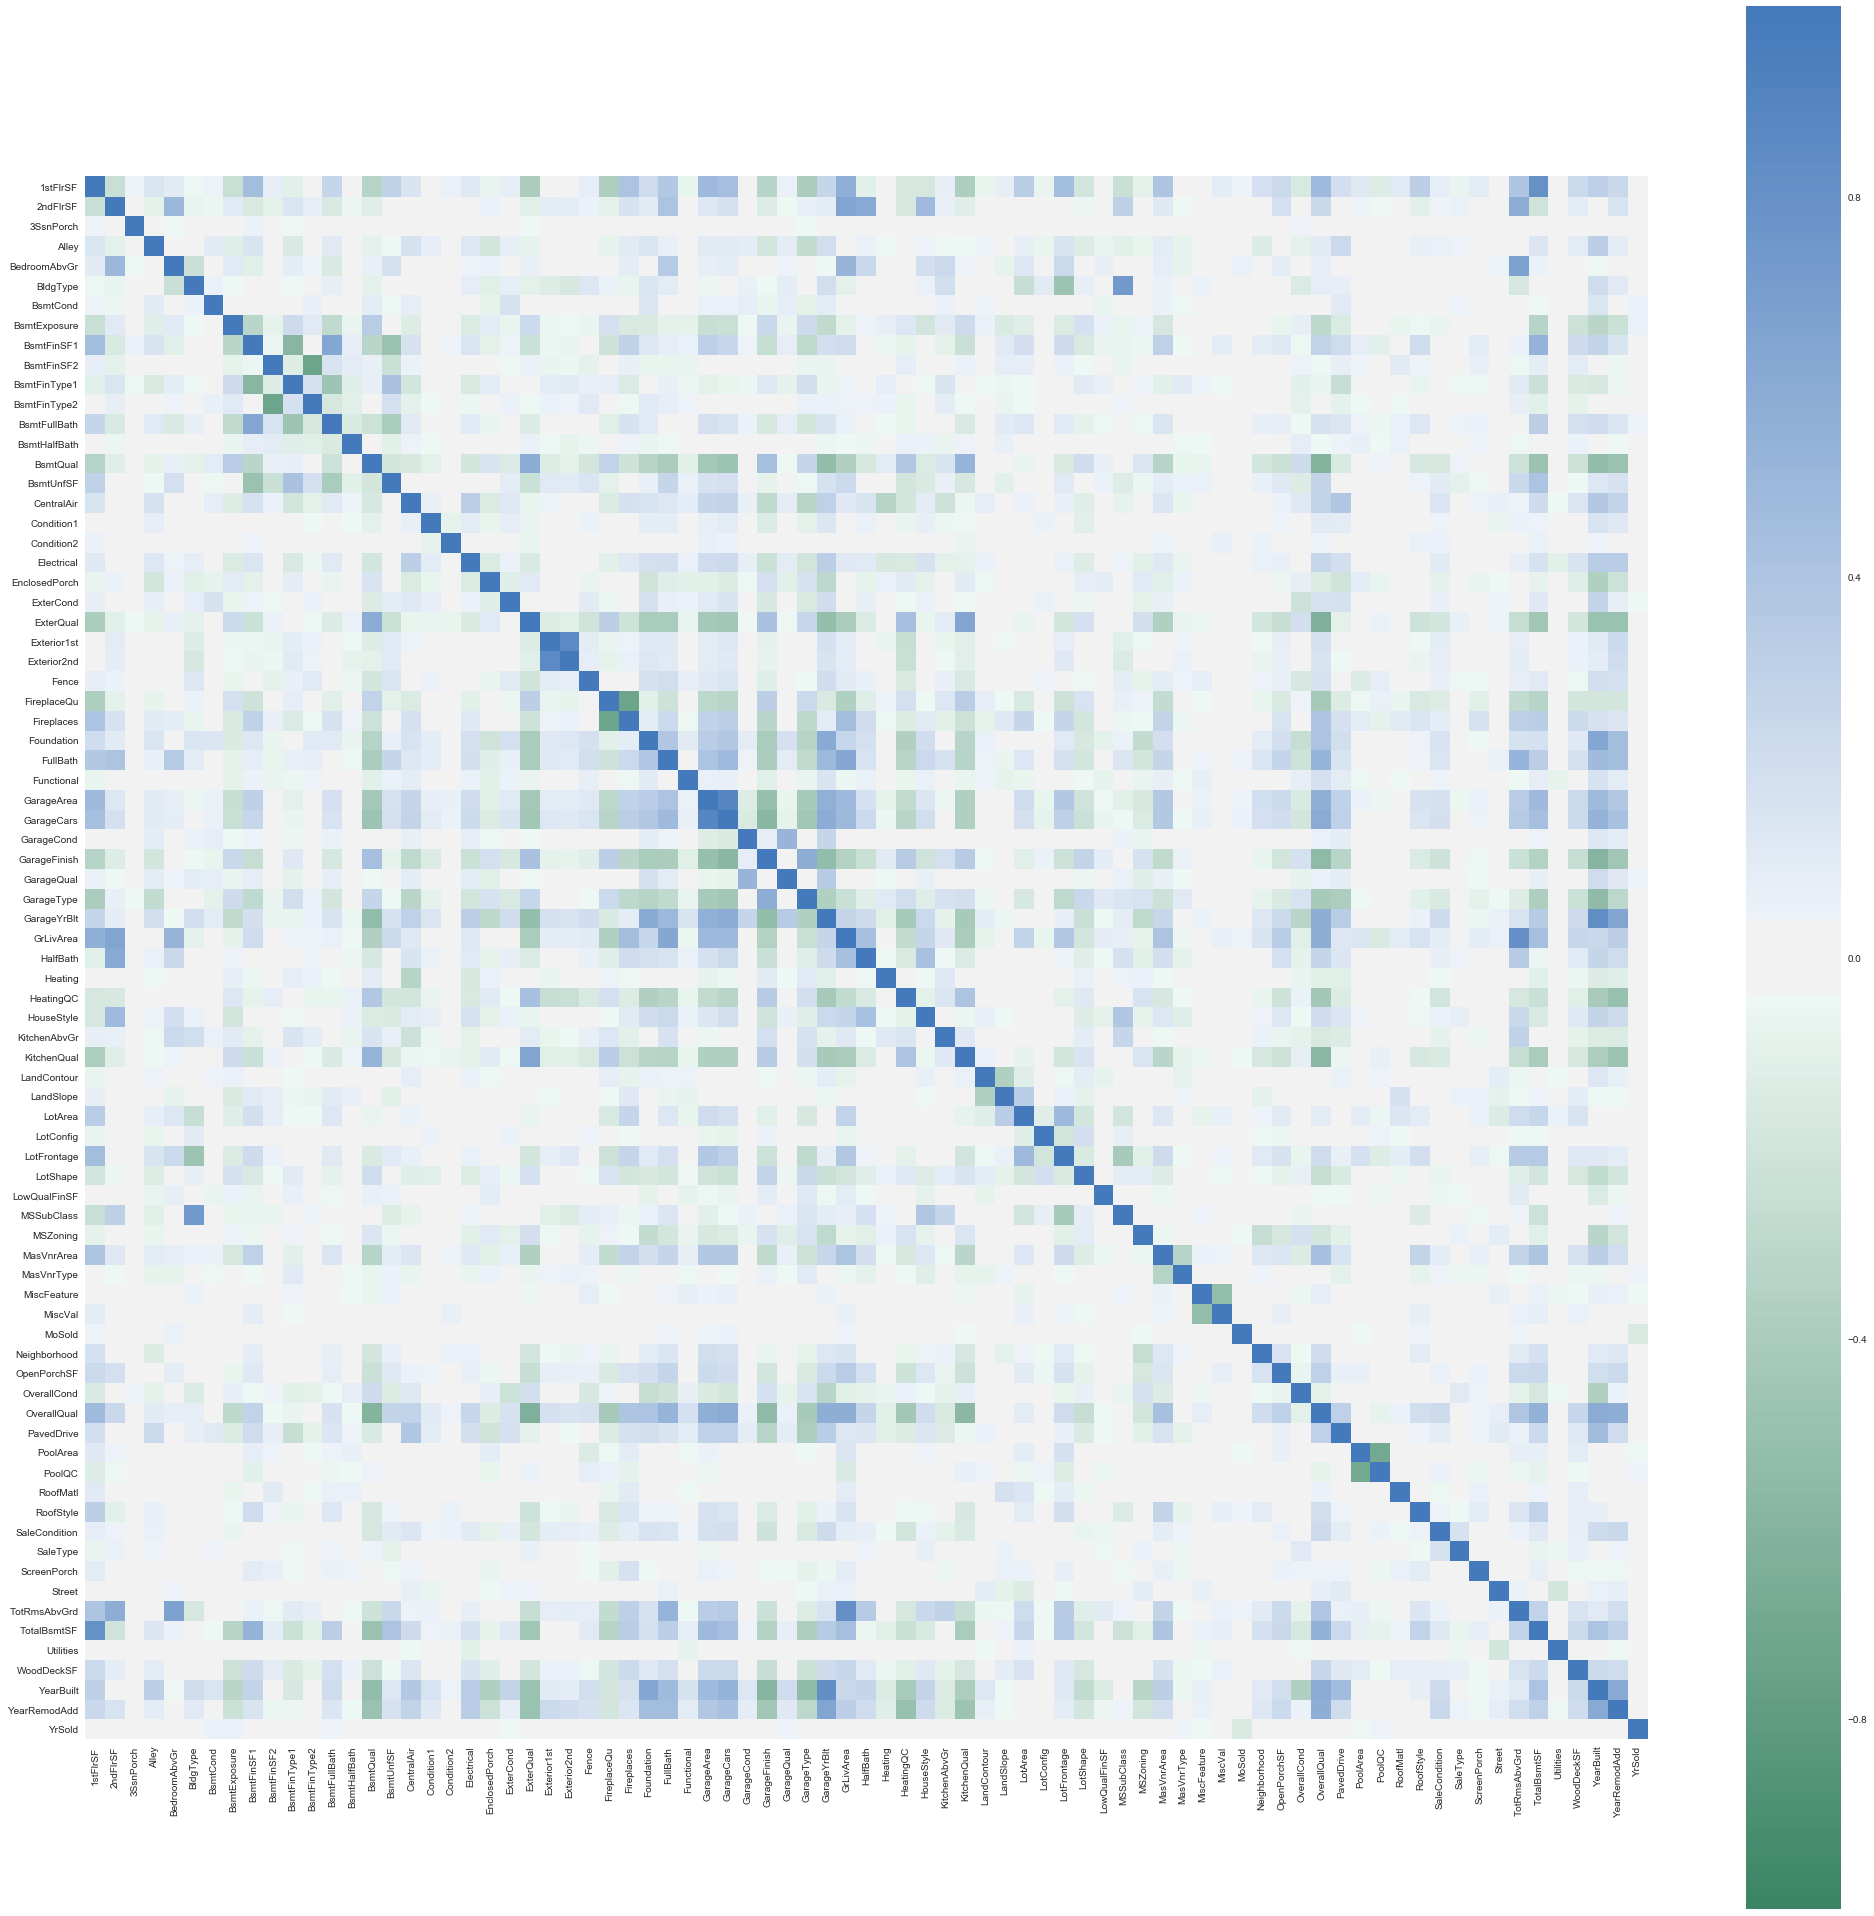

In [51]:
corr = all_data.corr()

plt.subplots(figsize=(35,35))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap)
plt.show()

In [55]:
corr['Neighborhood'].sort_values(ascending=False)

Neighborhood    1.000000
OverallQual     0.208275
GarageArea      0.198122
GarageCars      0.180727
1stFlrSF        0.175450
TotalBsmtSF     0.172795
OpenPorchSF     0.161606
GrLivArea       0.156037
FullBath        0.147107
GarageYrBlt     0.130438
MasVnrArea      0.127777
YearRemodAdd    0.125117
LotFrontage     0.116553
YearBuilt       0.111811
TotRmsAbvGrd    0.101848
RoofStyle       0.099794
Foundation      0.098587
BsmtFinSF1      0.091005
BsmtFullBath    0.073009
BsmtUnfSF       0.065476
Electrical      0.062490
KitchenAbvGr    0.052078
Condition2      0.047892
HouseStyle      0.044108
LotArea         0.042415
Fence           0.041851
MasVnrType      0.041597
WoodDeckSF      0.038705
Functional      0.038264
HalfBath        0.037835
                  ...   
MSSubClass      0.000605
ScreenPorch     0.000008
PoolQC         -0.001463
BsmtCond       -0.001692
GarageCond     -0.003237
Utilities      -0.005373
Condition1     -0.008462
MiscVal        -0.009784
3SsnPorch      -0.010006


In [53]:
high_corr

[('1stFlrSF', 'TotalBsmtSF', 0.80166997030928722),
 ('BldgType', 'MSSubClass', 0.74150822672572836),
 ('Exterior1st', 'Exterior2nd', 0.85581771510589866),
 ('Exterior2nd', 'Exterior1st', 0.85581771510589866),
 ('GarageArea', 'GarageCars', 0.88970041468584482),
 ('GarageCars', 'GarageArea', 0.88970041468584482),
 ('GarageYrBlt', 'YearBuilt', 0.8348123731631012),
 ('GrLivArea', 'TotRmsAbvGrd', 0.80835442054185425),
 ('MSSubClass', 'BldgType', 0.74150822672572836),
 ('TotRmsAbvGrd', 'GrLivArea', 0.80835442054185425),
 ('TotalBsmtSF', '1stFlrSF', 0.80166997030928722),
 ('YearBuilt', 'GarageYrBlt', 0.8348123731631012)]

In [58]:
corr.shape

(79, 79)